# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

## Problem Statement
In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

## Objective
This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

## Research Question
Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

# Importing Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [6]:
#loading the data

In [9]:
taxi_data = pd.read_csv(r"C:\Users\Pooja\Desktop\Projects\yellow taxi\yellow_tripdata_2020-01.csv")

In [17]:
taxi_data.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.2,1.0,6.0,4.800000
1,1.0,1.2,1.0,7.0,7.416667
2,1.0,0.6,1.0,6.0,6.183333
3,1.0,0.8,1.0,5.5,4.850000
4,1.0,0.0,2.0,3.5,2.300000


In [11]:
# Explortatory Data Analysis


In [12]:
taxi_data.shape

(6405008, 18)

In [15]:
taxi_data.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
duration                        float64
dtype: object

In [14]:
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

# subtracting the pickup time from dropoff time to get duration
taxi_data['duration'] = taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']

# converting into minutes
taxi_data['duration'] = taxi_data['duration'].dt.total_seconds()/60

In [16]:
taxi_data.drop(['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime',
                'RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','extra',
                'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge'
                ,'total_amount','congestion_surcharge'],
               axis = 1, inplace = True)

In [18]:
# filtered data with relevant columns essential for the analysis
taxi_data.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.2,1.0,6.0,4.800000
1,1.0,1.2,1.0,7.0,7.416667
2,1.0,0.6,1.0,6.0,6.183333
3,1.0,0.8,1.0,5.5,4.850000
4,1.0,0.0,2.0,3.5,2.300000


In [19]:
# check for missing values
taxi_data.isnull().sum()

passenger_count    65441
trip_distance          0
payment_type       65441
fare_amount            0
duration               0
dtype: int64

In [20]:
# percentage of missing data to the total record of the data
print('Missing data %',round(65441/len(taxi_data)*100,2))

Missing data % 1.02


In [21]:
#Since only 1% of data missing, we can simply drop the records with missing values.
taxi_data.dropna(inplace = True)

In [22]:
# changing the passenger count and payment type data type to integer 
taxi_data['passenger_count'] = taxi_data['passenger_count'].astype('int64')
taxi_data['payment_type'] = taxi_data['payment_type'].astype('int64')

In [25]:
# check for the duplicate rows 
taxi_data[taxi_data.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,duration
2056,1,0.00,2,7.0,0.000000
2441,1,0.00,1,52.0,0.200000
2446,2,1.70,1,9.5,13.066667
2465,1,0.40,1,4.0,3.083333
3344,1,1.20,1,6.0,5.350000
...,...,...,...,...,...
6339558,1,1.63,2,8.0,8.800000
6339559,1,1.81,1,8.5,8.016667
6339560,1,0.98,2,6.5,6.900000
6339562,1,2.10,1,11.0,14.233333


In [26]:
# removing duplicate rows as they will not contribute in analysis 
taxi_data.drop_duplicates(inplace = True)

In [27]:
# passenger count distribution
taxi_data['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [28]:
# payment type distribution
taxi_data['payment_type'].value_counts()

payment_type
1    2040133
2     925137
3      26233
4      16357
5          1
Name: count, dtype: int64

In [29]:
# filtering for payment type 1 and 2
taxi_data = taxi_data[taxi_data['payment_type']<3]

# filtering for passenger count from 1 to 2
taxi_data = taxi_data[(taxi_data['passenger_count']>0)&(taxi_data['passenger_count']<6)]

In [30]:
# replacing the payment type encoded value 1 and 2 to Card and Cash
taxi_data['payment_type'].replace([1,2],['Card','Cash'], inplace = True)

In [33]:
# descriptive statistics for data
taxi_data.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,4.583313e+00,1.766835e+01,2.418261e+01
std,1.179440e+00,4.897806e+00,1.447531e+01,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.530000e+00,9.000000e+00,9.950000e+00
50%,1.000000e+00,2.770000e+00,1.300000e+01,1.575000e+01
75%,2.000000e+00,5.500000e+00,2.100000e+01,2.333333e+01
max,5.000000e+00,2.628800e+02,4.265000e+03,8.525117e+03


Upon reviewing the provided statistics, it's evident that the minimum values for trip distance, fare amount, and duration are negative, which is unrealistic and invalid for further analysis. Consequently, we will eliminate these negative values from the dataset.

Furthermore, observing the maximum and 50th percentile values, it's possible that the data contains significant outliers, particularly high values. These outliers need to be addressed and removed to ensure the integrity of the analysis.

In [32]:
# filtering the records for only positive values
taxi_data = taxi_data[taxi_data['fare_amount']>0]
taxi_data = taxi_data[taxi_data['trip_distance']>0]
taxi_data = taxi_data[taxi_data['duration']>0]

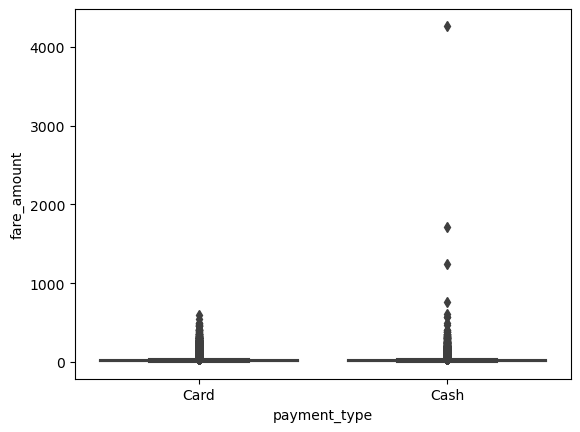

In [34]:
# check for the outliers
sns.boxplot(data=taxi_data, y="fare_amount", x="payment_type")
plt.show()

In [35]:
for col in ['trip_distance','fare_amount','duration']:
    Q1 = taxi_data[col].quantile(0.25)
    Q3 = taxi_data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    taxi_data = taxi_data[(taxi_data[col] >= lower_bound) & (taxi_data[col] <= upper_bound)]

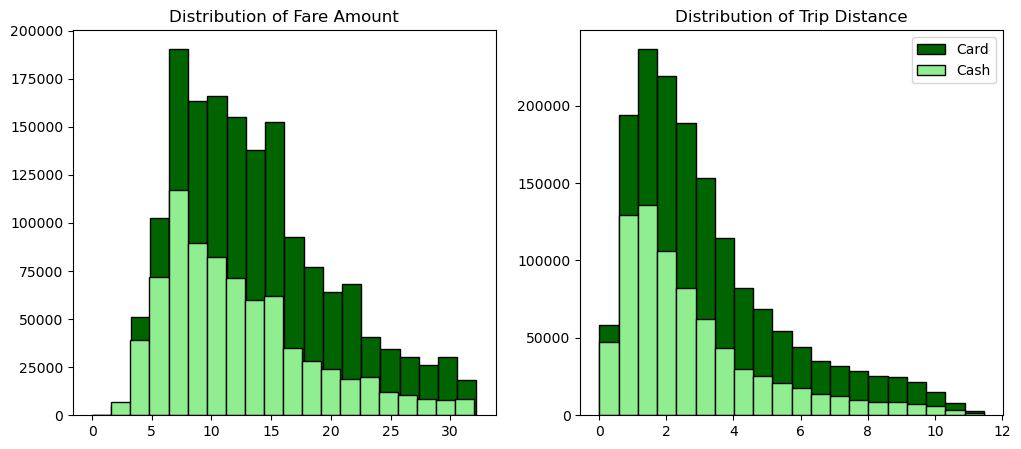

In [39]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(taxi_data[taxi_data['payment_type']=='Card']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#006400', label = 'Card')
plt.hist(taxi_data[taxi_data['payment_type']=='Cash']['fare_amount'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#90EE90',label = 'Cash')

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(taxi_data[taxi_data['payment_type']=='Card']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k',color = '#006400',label = 'Card')
plt.hist(taxi_data[taxi_data['payment_type']=='Cash']['trip_distance'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#90EE90',label = 'Cash')
plt.legend()
plt.show()

In [40]:
taxi_data.groupby('payment_type').agg({'fare_amount': ['mean', 'std',], 'trip_distance': ['mean', 'std'],})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.701903  6.506356      3.230729  2.320528
Cash           12.250209  6.246104      2.803716  2.231871

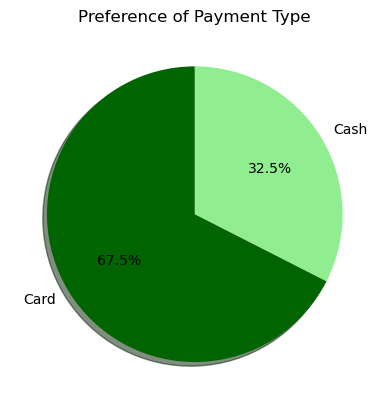

In [41]:
plt.title('Preference of Payment Type')
plt.pie(taxi_data['payment_type'].value_counts(normalize = True), labels = taxi_data['payment_type'].value_counts().index,
       startangle = 90,shadow = True, autopct = '%1.1f%%', colors = ['#006400','#90EE90'])
plt.show()

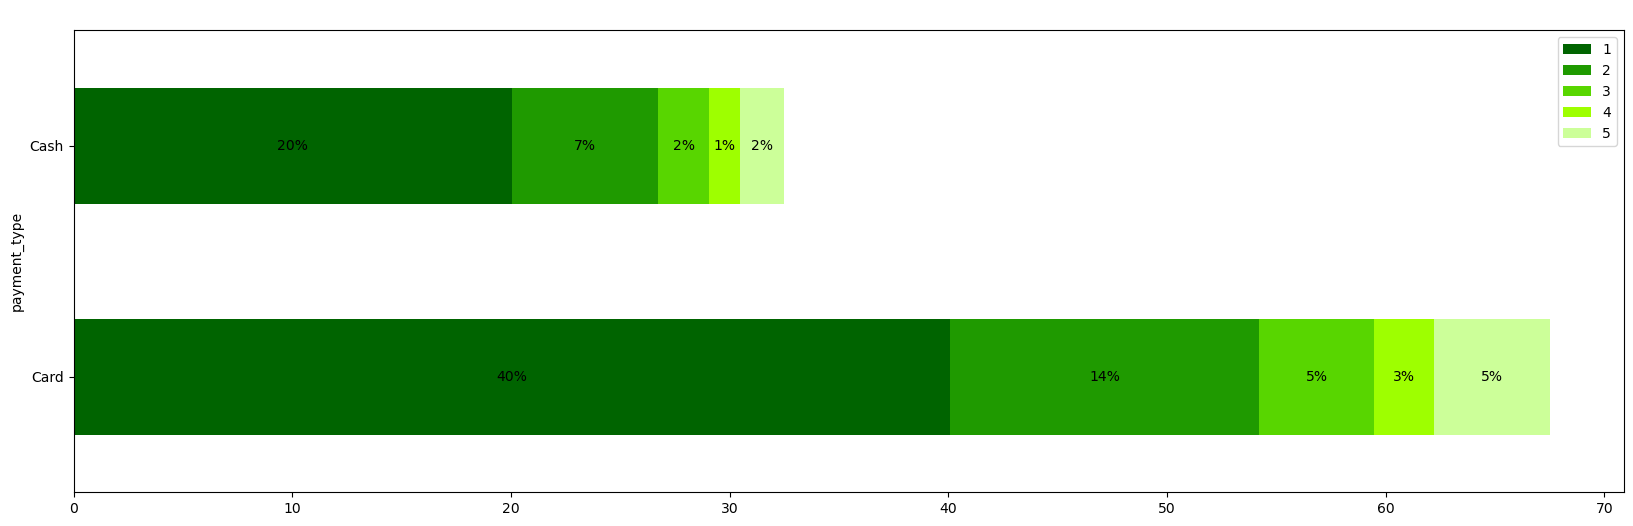

In [43]:
# calculating the total passenger count distribution based on the different payment type
passenger_count = taxi_data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

# renaming the passenger_count to count to reset the index
passenger_count.rename(columns = {'passenger_count':'count'},inplace = True)
passenger_count.reset_index(inplace = True)

# calculating the percentage of the each passenger count
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

# creating a new empty dataframe to store the distribution of each payment type (useful for the visualization)
df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df['payment_type'] = ['Card','Cash']
df.iloc[0,1:] = passenger_count.iloc[:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]

fig, ax = plt.subplots(figsize=(20, 6)) 
df.plot(x='payment_type', kind='barh', stacked=True, title=' ', ax=ax, color = ['#006400', '#1F9A00', '#58D600', '#9EFF00', '#CCFF99'] )

# Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

# Hypothesis Testing

In order to select the most suitable test for our scenario, our initial step involves evaluating whether the distribution of fare amounts adheres to a normal distribution. While the histogram depicted above suggests otherwise, we will further confirm this by generating a QQ plot.

Quantile-quantile (QQ) plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributed. If the data points closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution.

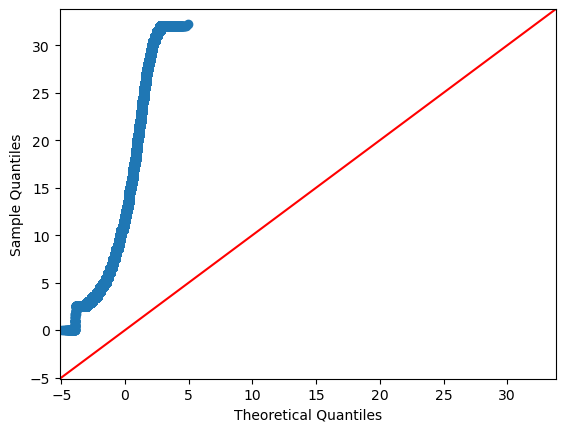

In [45]:
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(taxi_data['fare_amount'], line='45')
plt.show()

The data values clearly do not follow the red 45-degree line, which is an indication that they do not follow a normal distribution. So, z distribution will not be good for this. That's why we will use T test.

Given that the T-test can be applied to both small and large samples and does not require the population standard deviation, it is a more universally applicable approach for hypothesis testing in many practical research scenarios, including analyses of taxi trip data.


In the analysis of NYC Yellow Taxi Trip Records, where you're likely dealing with an unknown population standard deviation and potentially large datasets, the T-test offers a more appropriate and flexible method for comparing means between two groups (e.g., fare amounts by payment type). It provides a reliable way to infer about the population, accommodating the uncertainty that comes with estimating population parameters from sample data.

hypothesis
**Null hypothesis**: There is no difference in average fare between customers who use credit cards and customers who use cash. 

**Alternative hypothesis**: There is a difference in average fare between customers who use credit cards and customers who use cash

In [46]:
# sample 1
credit_card = taxi_data[taxi_data['payment_type'] == 'Card']['fare_amount']

# sample 2
cash = taxi_data[taxi_data['payment_type'] == 'Cash']['fare_amount']

# performing t test on both the different sample
t_stat, p_value = stats.ttest_ind(a=credit_card, b=cash, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\nReject the null hypothesis")
else:
    print("\nAccept the null hypothesis")

T-statistic: 165.59915491544626, P-value: 0.0

Reject the null hypothesis


Since the p-value is significantly smaller than the significance level of 5%, we will reject the null hypothesis.

You conclude that there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.